RESOLUÇÃO LISTA 02 - NUMERO 06

In [62]:
# Importar as bibliotecas
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
from pylab import *
import numpy as np
import random

%matplotlib inline

In [63]:
# Definindo númeto de amostras
M = 1000

In [64]:
# Features e Ruido
x = np.random.uniform(-5, 5, M).reshape(M, 1)
w = np.random.normal(0, np.sqrt(10), M).reshape(M, 1)

# Target
y = 3 + 1.5*x + 2.3*(x**2) + w

In [66]:
# Forma Fechada
X = np.c_[np.ones((M, 1)), x, x**2]

a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))

yhat = X.dot(a_opt)

Joptimum = (2.0/M)*np.sum(np.power((y - yhat), 2))

In [67]:
#Gradiente Descendente em Batelada

# Numero máximo de iterações
N_Iter = 1000

# Atribuindo o valor de Alpha
alpha = 0.007

Jgd = np.zeros(N_Iter+1)

# Criando um vetor com 3 linhas, pois temos a0, a1 e a2.
a = np.array([-30.0, -30.0, -30.0]).reshape(3,1)

Jgd[0] = (1.0/M)*np.sum(np.power((y - X.dot(a)), 2))

error = 1
iteration = 0
while(iteration < N_Iter and error > 0.001):
    
    update = -(2.0/M)*X.T.dot(y - X.dot(a)) 
    
    a = a - alpha*update

    Jgd[iteration+1] = (1.0/M)*sum(np.power((y - X.dot(a)), 2)) 
    
    error = np.abs(Jgd[iteration+1]-Jgd[iteration])
    
    iteration = iteration + 1

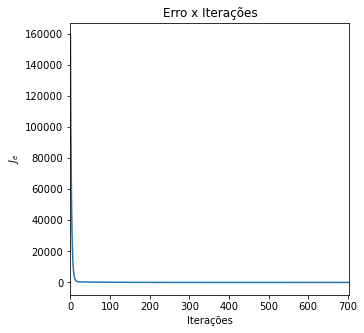

In [68]:
fig = plt.figure(figsize=(5,5))

plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
#plt.yscale('log')
plt.xlabel('Iterações')
plt.ylabel('$J_e$')
plt.title('Erro x Iterações')
plt.show()

In [69]:
print(a_opt)
print('a0_opt {}'.format(a_opt[0][0]))
print('a1_opt {}'.format(a_opt[1][0]))
print('a2_opt {}'.format(a_opt[2][0]))

[[3.43183788]
 [1.44986703]
 [2.28547382]]
a0_opt 3.431837875268151
a1_opt 1.4498670308900552
a2_opt 2.285473818761246


In [70]:
print(a)
print('a0 {}'.format(a[0][0]))
print('a1 {}'.format(a[1][0]))
print('a2 {}'.format(a[2][0]))

[[2.9995793 ]
 [1.4500864 ]
 [2.31420972]]
a0 2.999579299906293
a1 1.4500863972721447
a2 2.3142097172596654
